In [106]:
import matplotlib.image as mplimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

This image is: <class 'numpy.ndarray'>  with dimensions: (842, 1132, 3)


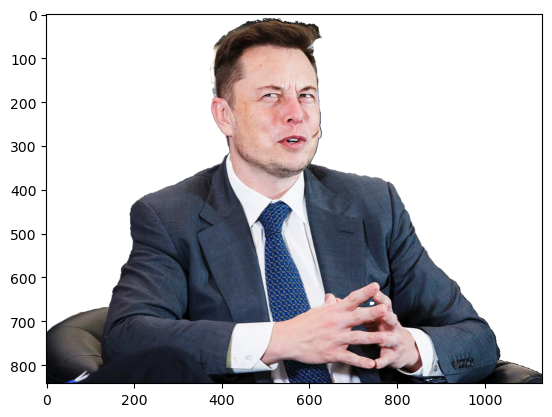

In [120]:
#Read the photo of Elon
init_photo = "E3.png"
image = cv2.imread(init_photo)
image_copy = np.copy(image)

#Change BGR to RGB and check the sizes
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)
print('This image is:', type(image_copy), 
      ' with dimensions:', image_copy.shape)

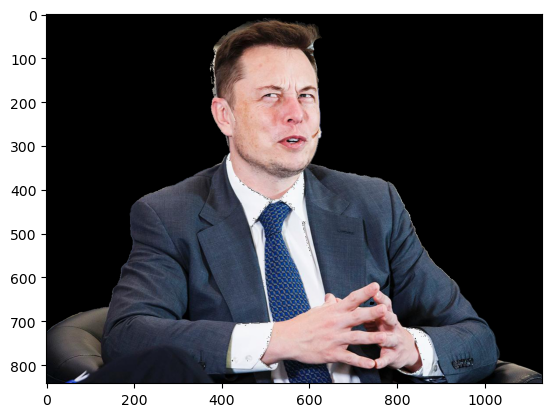

In [121]:
#Setup the gap for the treshold
lower_blue = np.array([250,250,250]) 
upper_blue = np.array([255,255,255])

# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

#Apply the mask
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

This image is: <class 'numpy.ndarray'>  with dimensions: (852, 1136, 3)


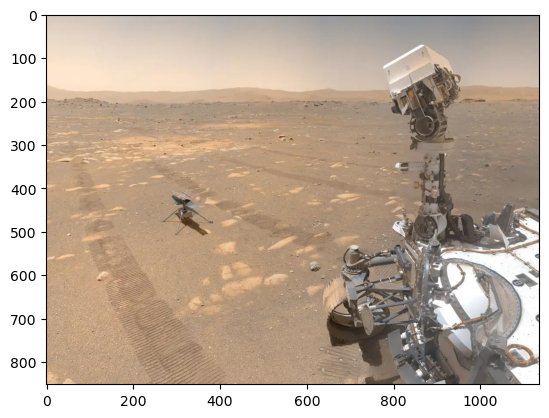

In [122]:
#Read the background image of Mars
background_image = cv2.imread('M1.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
plt.imshow(background_image)
print('This image is:', type(background_image), 
      ' with dimensions:', background_image.shape)

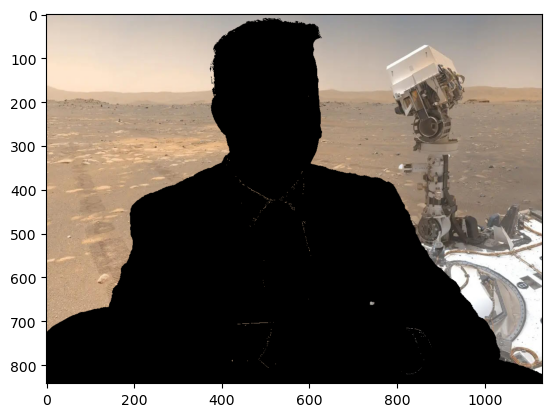

In [123]:
# Crop it to the right size (842x1132)
crop_background = background_image[0:842, 0:1132]

# Mask the cropped background
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

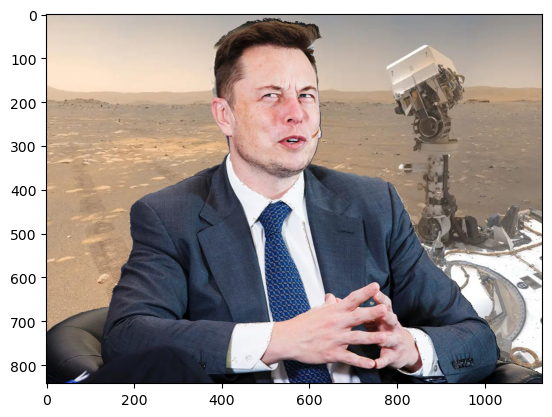

In [124]:
# Add the two images together to create a complete image
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)